In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.pipeline import Pipeline

In [2]:
df=pd.read_csv("C:\Desktop\ml\ml_practice\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# corr = df.corr()
# plt.figure(figsize = (16, 9))
# sn.heatmap(corr, annot = True)

In [7]:
df.shape

(10000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df=df.drop(['RowNumber','CustomerId'],axis='columns')

In [11]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# df['Gender_n'] = df['Gender'].apply(lambda x:1 if x=='Male' else 0)
# df=df.drop(['Gender'],axis='columns')
# df.head()

In [13]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'].values)
df['Gender'] = le.fit_transform(df['Gender'].values)
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  int32  
 3   Gender           10000 non-null  int32  
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7), object(1)
memory usage: 859.5+ KB


In [16]:
df.Surname.value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [17]:
df = df.apply(lambda x: x.astype(float) if x.dtype == 'int64' else x)
df = df.apply(lambda x: x.astype(float) if x.dtype == 'int32' else x)
df=df.drop(['Surname'],axis='columns')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  float64
 2   Gender           10000 non-null  float64
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [20]:
corr = df.corr()

<Axes: >

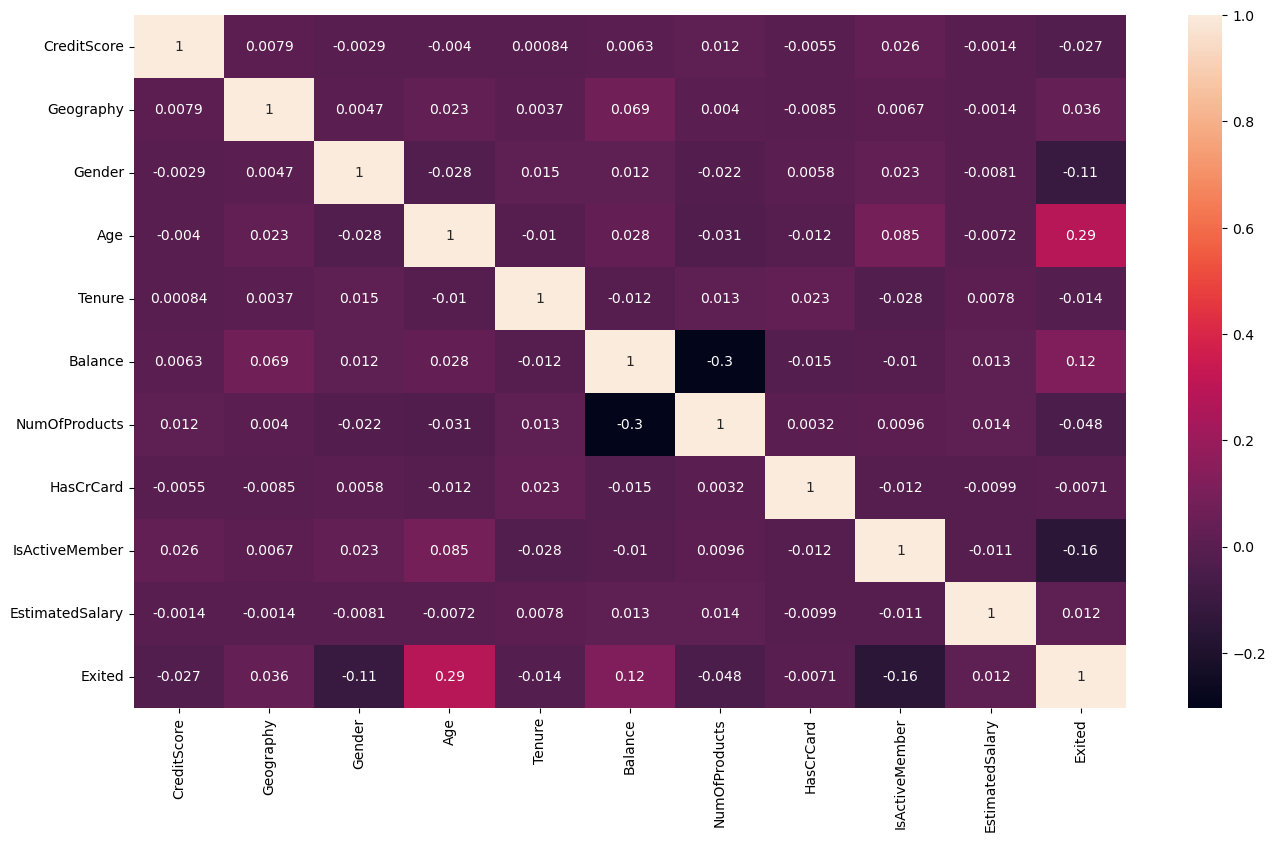

In [21]:
plt.figure(figsize = (16, 9))
sn.heatmap(corr, annot = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  float64
 2   Gender           10000 non-null  float64
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  float64
dtypes: float64(11)
memory usage: 859.5 KB


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import SVC

In [26]:
x=df.drop(['Exited'],axis='columns')
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train ,y_test =train_test_split(x ,y,test_size=0.2,random_state=42)

In [29]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

sv1= svm.SVC(gamma='auto', C=10, kernel='rbf')
sv1.fit(x_train,y_train)


SVC(C=10, gamma='auto')

In [30]:
sv1.score(x_test,y_test)

0.8035

In [31]:
sv2= svm.SVC(gamma='auto', C=10, kernel='linear')
sv2.fit(x_train,y_train)


SVC(C=10, gamma='auto', kernel='linear')

In [32]:
sv2.score(x_test,y_test)

0.794

In [38]:
r1= RandomForestClassifier(n_estimators=20)
r1.fit(x_train,y_train)
r1.score(x_test,y_test)

0.8625

In [39]:
r1= RandomForestClassifier(n_estimators=40)
r1.fit(x_train,y_train)
r1.score(x_test,y_test)

0.865

In [40]:
r1= RandomForestClassifier(n_estimators=2)
r1.fit(x_train,y_train)
r1.score(x_test,y_test)

0.837

In [42]:
r2= RandomForestClassifier(n_estimators=200)
r2.fit(x_train,y_train)
r2.score(x_test,y_test)

0.8655

In [44]:
l1= LogisticRegression(solver='liblinear',multi_class='auto',C=10)
l1.fit(x_train,y_train)
l1.score(x_test,y_test)

0.8015

In [48]:
l1= LogisticRegression(solver='liblinear',multi_class='auto',C=10000000000)
l1.fit(x_train,y_train)
l1.score(x_test,y_test)

0.8015

In [50]:
g1=GradientBoostingRegressor()
g1.fit(x_train,y_train)
g1.score(x_test,y_test)

0.36569485853800177

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knng1 = KNeighborsClassifier(n_neighbors=12)
knng1.fit(x_train,y_train)
knng1.score(x_test,y_test)

0.7975

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knng12 = KNeighborsClassifier(n_neighbors=50)
knng12.fit(x_train,y_train)
knng12.score(x_test,y_test)

0.8035

In [49]:
# # model_paramas ={(
# #     'svm':{
# #         'model':svm.SVC(gamma='auto'),
# #         'params':{
# #             'C':[1,10,20],
# #             'kernel':['rbf','linear']
# #         }
# #     },
# #     'random_forest':{
# #         'model':RandomForestClassifier(),
# #         'params':{
# #             'n_estimators':[1,5,10,20,40]
# #         }
# #     },
# #     'logistic_regression':{
# #         'model':LogisticRegression(solver='liblinear',multi_class='auto'),
# #         'params':{
# #             'C':[1,5,10]
# #         }
# #     },
# #     'GradientBoostingRegressor':{
# #         'model':GradientBoostingRegressor(),
# #         'params':{
            
# #         }
# #     }
# # })